In [1]:
import numpy as np
from numpy import random
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline 

#matrix factorization packages
from sklearn.decomposition import FastICA, NMF
from pysptools import eea

In [2]:
#draw 559 samples from a normal Gaussian distribution 
random_noise=np.random.normal(loc=1, size=(559))

Define parameters for normal distribution

In [3]:
mu=400; variance=250; sigma=math.sqrt(variance); x=np.linspace(0,559,559)
#mu2=0; variance2=1; sigma2=math.sqrt(variance2); x2=np.linspace(mu2-5*sigma2, mu2+5*sigma2, 100)
mu2=250; variance2=100; sigma2=math.sqrt(variance2); x2=np.linspace(0, 559, 559)

Create normal distributions. These will be constituent spectra

In [4]:
#segmentA=mlab.normpdf(x, mu, sigma).reshape(559,1)*.2
#segmentB=mlab.normpdf(x2, mu2, sigma2).reshape(100,1)*.5
constituentA=np.zeros((559,1))
#constituentA[20:80]=segmentA
constituentA=mlab.normpdf(x, mu, sigma).reshape(559,1)*.5+mlab.normpdf(x, mu-3*sigma, sigma).reshape(559,1)*.25
constituentB=np.zeros((559,1))
#constituentB[400:500]=segmentB
constituentB=mlab.normpdf(x2, mu2, sigma2).reshape(559,1)*.5

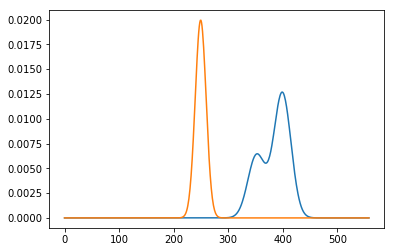

In [5]:
plt.plot(constituentA)
plt.plot(constituentB)

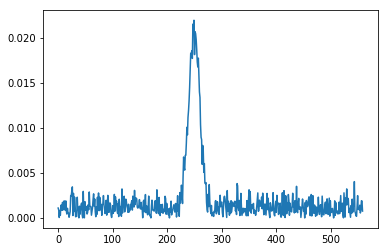

In [6]:
test=abs((random_noise.reshape(559,1)/1000)+constituentB)
plt.plot(test)

Make hyperspectral matrix

In [7]:
hyper=np.zeros((64,64,559))
for x in range(hyper.shape[0]):
    for y in range(hyper.shape[1]):
        if x%2==0:
            hyper[x,y,:]=constituentA.reshape(559)+abs(random_noise.reshape(559)/1000)
        else:
            hyper[x,y]=hyper[x,y]
        if y%3==0:
            hyper[x,y]+=constituentB.reshape(559)+abs(random_noise.reshape(559)/1000)
        else:
            hyper[x,y]=hyper[x,y]

#totally random spectra -- independent components
hyper2=np.zeros((64,64,559))
for x in range(hyper.shape[0]):
    for y in range(hyper.shape[1]):
            hyper2[x,y,:]=random.rand(1)*constituentA.reshape(559)+abs(random_noise.reshape(559)/1000)\
            +random.rand(1)*constituentB.reshape(559)+abs(random_noise.reshape(559)/1000)

#random, dependent components
hyper3=np.zeros((64,64,559))
for x in range(hyper.shape[0]):
    for y in range(hyper.shape[1]):
        frac=random.rand(1)
        hyper3[x,y,:]=frac*constituentA.reshape(559)+abs(random_noise.reshape(559)/1000)\
        +(1-frac)*constituentB.reshape(559)+abs(random_noise.reshape(559)/1000)
        
#pure regions with random spectra surrounding
hyper4=np.zeros((64,64,559))
hyper4[12:20, 45:50]=constituentA.reshape(559)
hyper4[42:62, 2:22]=constituentB.reshape(559)
for x in range(hyper.shape[0]):
    for y in range(hyper.shape[1]):
        if hyper4[x,y,:].all()==0:
             hyper4[x,y,:]=random.rand(1)*constituentA.reshape(559)+abs(random_noise.reshape(559)/1000)\
            +random.rand(1)*constituentB.reshape(559)+abs(random_noise.reshape(559)/1000)
            
#pure regions with dependent spectra surrounding
hyper5=np.zeros((64,64,559))
hyper5[12:20, 45:50]=constituentA.reshape(559)
hyper5[42:62, 2:22]=constituentB.reshape(559)
for x in range(hyper.shape[0]):
    for y in range(hyper.shape[1]):
        if hyper5[x,y,:].all()==0:
            frac=random.rand(1)
            hyper5[x,y:]=frac*constituentA.reshape(559)+abs(random_noise.reshape(559)/1000)\
            +(1-frac)*constituentB.reshape(559)+abs(random_noise.reshape(559)/1000)
        

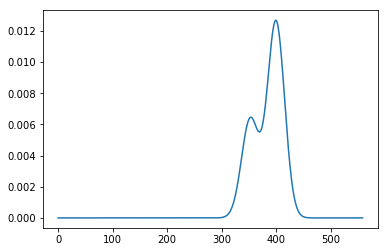

In [8]:
plt.plot(constituentA)

In [9]:
hyper_list=hyper4.reshape(4096,559)

### ICA

In [10]:
ica = FastICA(n_components=2, max_iter=400)
#reconstruct signals
S = ica.fit_transform(hyper_list)
#mixing matrix
A = ica.mixing_ 
ICA_comp=ica.components_

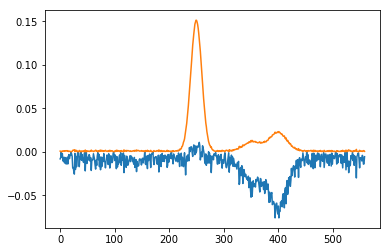

In [11]:
plt.plot(ICA_comp[0,:])
plt.plot(ICA_comp[1,:])

### Nonnegative Matrix Factorization

In [45]:
NMF_model=NMF(n_components=2)
NMF_fit=NMF_model.fit_transform(hyper_list)
NMF_comp=NMF_model.components_

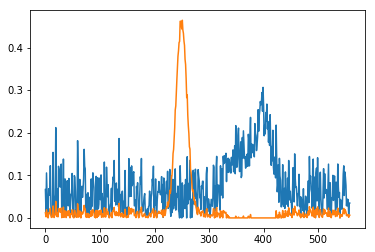

In [46]:
plt.plot(NMF_comp[0,:])
plt.plot(NMF_comp[1,:])

### Automatic Target Generation

In [ ]:
ATG=eea.ATGP()
ATG_comp=ATG.extract(hyper4, q=2)

In [ ]:
plt.plot(ATG_comp[0,:])

In [ ]:
plt.plot(ATG_comp[1,:])

### Pixel Purity Index

In [125]:
PPI=eea.PPI()
PPI_comp=PPI.extract(hyper,q=2)

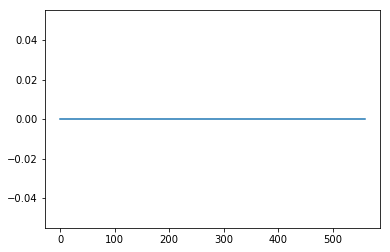

In [126]:
plt.plot(PPI_comp[0,:])

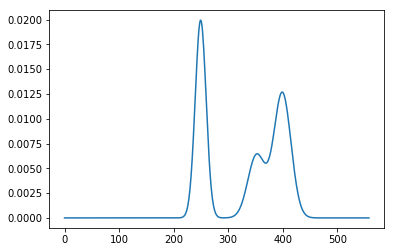

In [127]:
plt.plot(PPI_comp[1,:])

### Fast Iterative Pixel Purity Index (FIPPI)

In [284]:
FIPPI=eea.FIPPI()
FIPPI_comp=FIPPI.extract(hyper4, q=2)

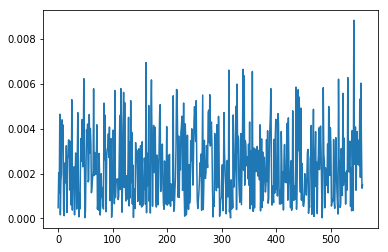

In [285]:
plt.plot(FIPPI_comp[0,:])

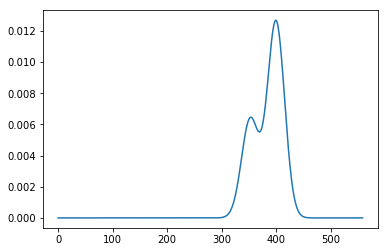

In [286]:
plt.plot(FIPPI_comp[1,:])

### N-FINDR

In [138]:
NFINDR=eea.NFINDR()
NFINDR_comp=NFINDR.extract(hyper, q=5)

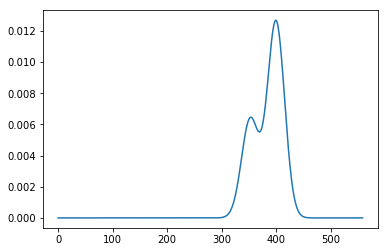

In [139]:
plt.plot(NFINDR_comp[0,:])

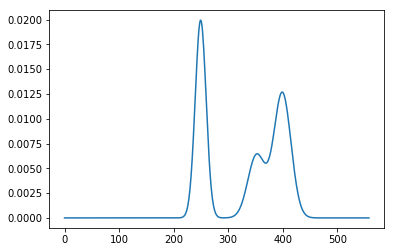

In [140]:
plt.plot(NFINDR_comp[1,:])